#### Frame Loading and Preprocessing

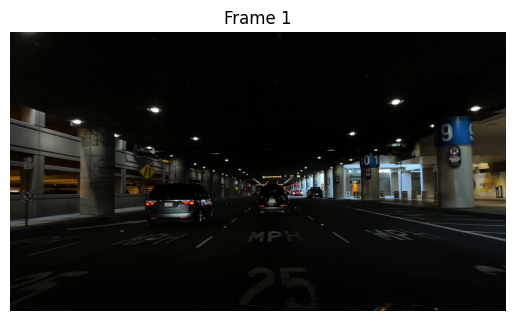

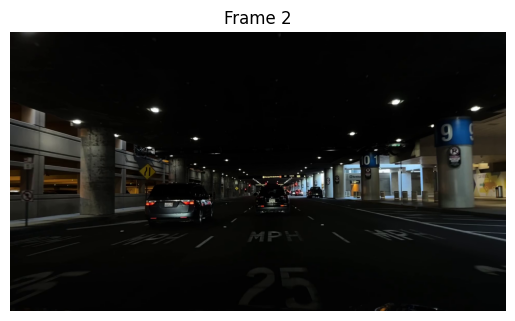

In [75]:
import cv2
from matplotlib import pyplot as plt

# Path to your video (adjust as needed)
video_path1 = '../data/leaves.mp4'
video_path2 = '../data/cars.mp4'

# Open the video
cap = cv2.VideoCapture(video_path2)

# Check if video loaded successfully
if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    # Read first 30 frames and display them
    for i in range(2):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Show frame
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title(f'Frame {i+1}')
        plt.show()

cap.release()


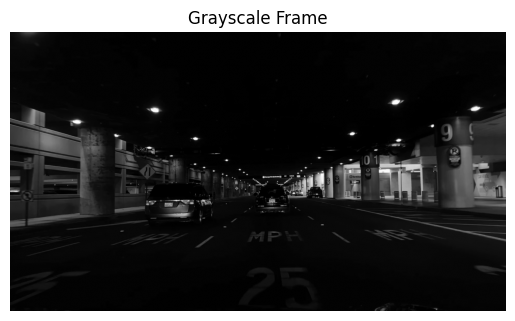

In [76]:
grey_frame = frame_rgb[:, :, 0] * 0.299 + frame_rgb[:, :, 1] * 0.587 + frame_rgb[:, :, 2] * 0.114
# Convert to grayscale
img = grey_frame.astype('uint8')
# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f'Grayscale Frame')
plt.show()
        

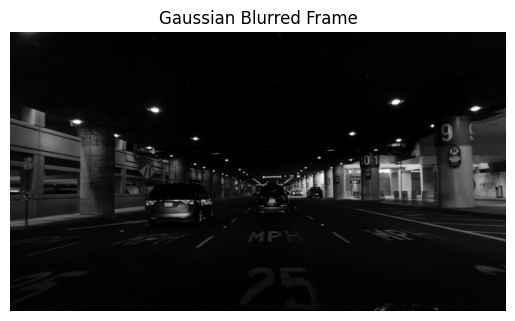

In [77]:
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
# Display the Gaussian blurred image    
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.title('Gaussian Blurred Frame')
plt.show()

#### Blob Detection ( Single Frame )

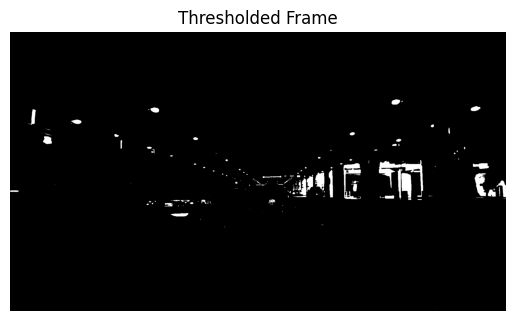

In [78]:
# Apply thresholding
thresh_img = cv2.threshold(gaussian_blur, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_img[1], cmap='gray')
plt.axis('off')     
plt.title('Thresholded Frame')
plt.show()

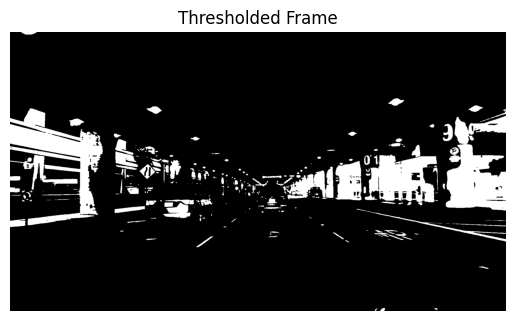

In [79]:
# Apply Otsu's thresholding
otsu_thresh_img = cv2.threshold(gaussian_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_thresh_img[1], cmap='gray')
plt.axis('off')
plt.title('Thresholded Frame')
plt.show()

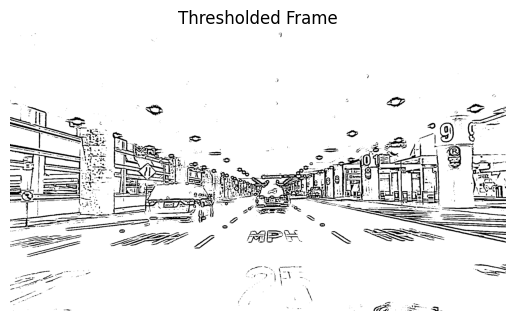

In [80]:
# Adaptive thresholding USING Gaussian method
adaptive_thresh_img = cv2.adaptiveThreshold(gaussian_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh_img, cmap='gray')
plt.axis('off')
plt.title('Thresholded Frame')
plt.show()


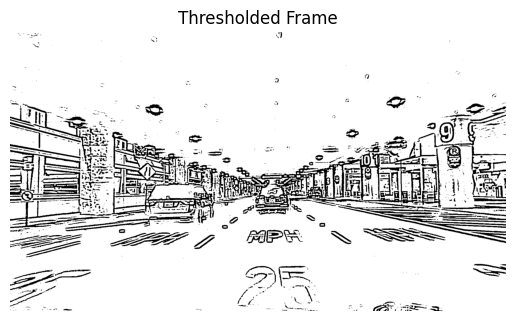

In [81]:
# Adaptive thresholding using mean
adaptive_mean_thresh_img = cv2.adaptiveThreshold(gaussian_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_mean_thresh_img, cmap='gray')
plt.axis('off')
plt.title('Thresholded Frame')
plt.show()

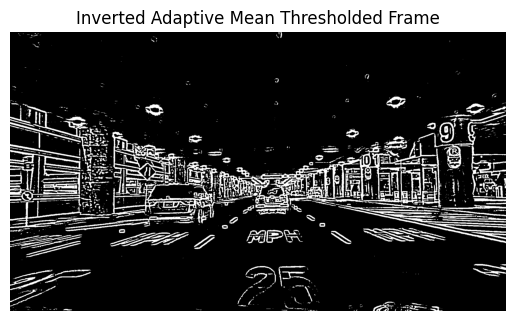

In [82]:
adaptive_mean_thresh_img = cv2.bitwise_not(adaptive_mean_thresh_img)
# Display the inverted adaptive mean thresholded image
plt.imshow(adaptive_mean_thresh_img, cmap='gray')   
plt.axis('off')
plt.title('Inverted Adaptive Mean Thresholded Frame')
plt.show()

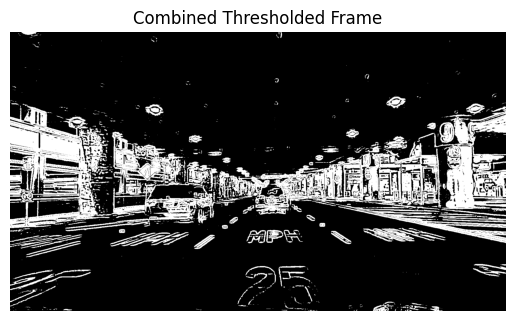

In [83]:
combined = cv2.bitwise_xor(otsu_thresh_img[1], adaptive_mean_thresh_img)
plt.imshow(combined, cmap='gray')
plt.axis('off')     
plt.title('Combined Thresholded Frame')
plt.show()

##### We will use inverted adaptive mean threshold for this analysis as it's presenting most detailed video

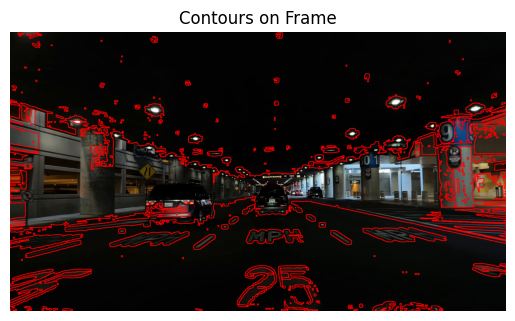

In [97]:
final_thresh =  adaptive_mean_thresh_img

contours, _ = cv2.findContours(final_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_frame = frame_rgb.copy()
cv2.drawContours(contour_frame, contours, -1, (255, 0, 0), 2)
plt.imshow(contour_frame)
plt.axis('off')
plt.title('Contours on Frame')
plt.show()


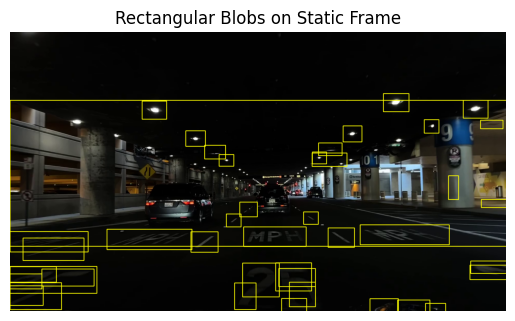

In [129]:
MIN_AREA = 500  # Adjust based on your visual preference

contours, _ = cv2.findContours(final_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_frame = frame_rgb.copy()

for contour in contours:
    area = cv2.contourArea(contour)
    if area > MIN_AREA:
        x, y, w, h = cv2.boundingRect(contour)
        
        # Optional: Add padding for visual effect
        pad = 10
        x = max(0, x - pad)
        y = max(0, y - pad)
        w += pad * 2
        h += pad * 2

        # Draw rectangle
        cv2.rectangle(contour_frame, (x, y), (x + w, y + h), (255, 255, 0), 2)

plt.imshow(contour_frame)
plt.axis('off')
plt.title('Rectangular Blobs on Static Frame')
plt.show()


### Video Manipulation

In [160]:
cap = cv2.VideoCapture(video_path2)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)

print("Frame count:", frame_count)
print("FPS:", fps)

if fps == 0:
    print("⚠️ Warning: FPS is zero. OpenCV might not have read the video correctly.")
else:
    duration = frame_count / fps
    print(f"Duration: {duration:.2f} seconds")


Frame count: 618
FPS: 29.97002997002997
Duration: 20.62 seconds


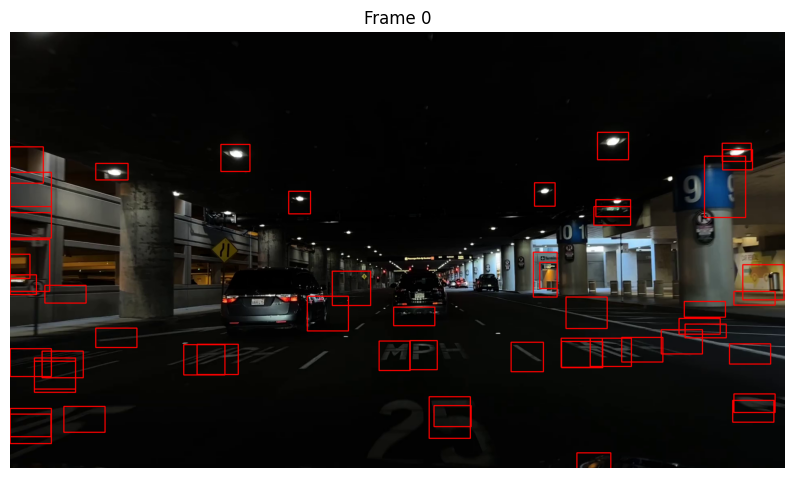

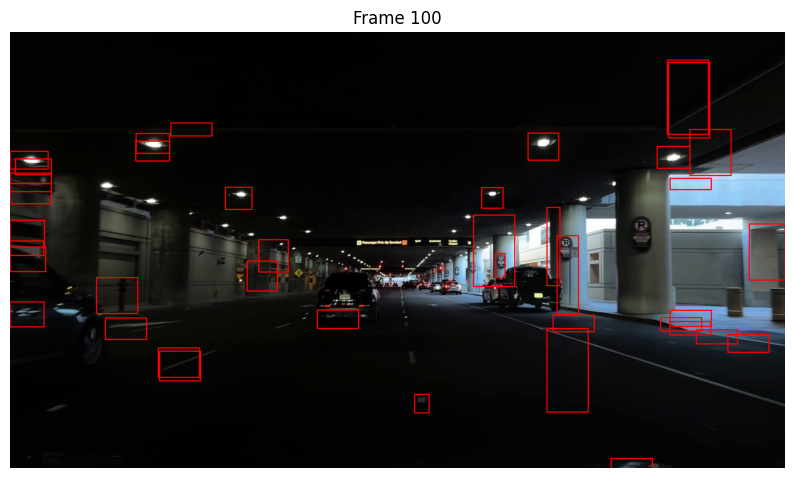

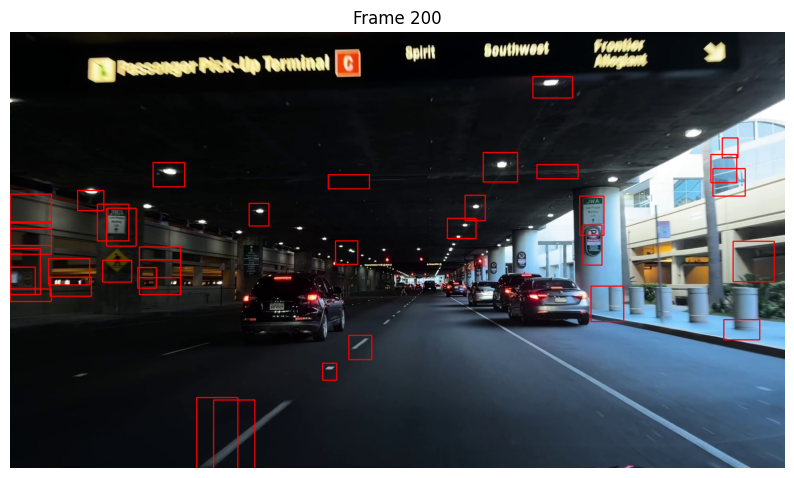

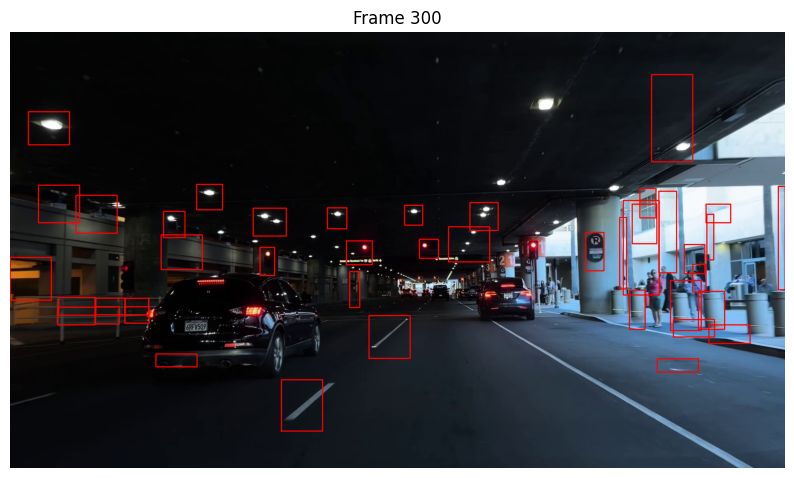

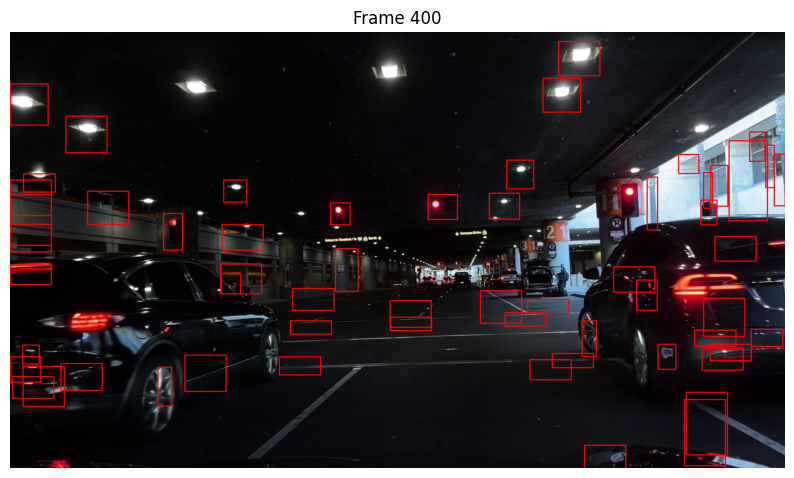

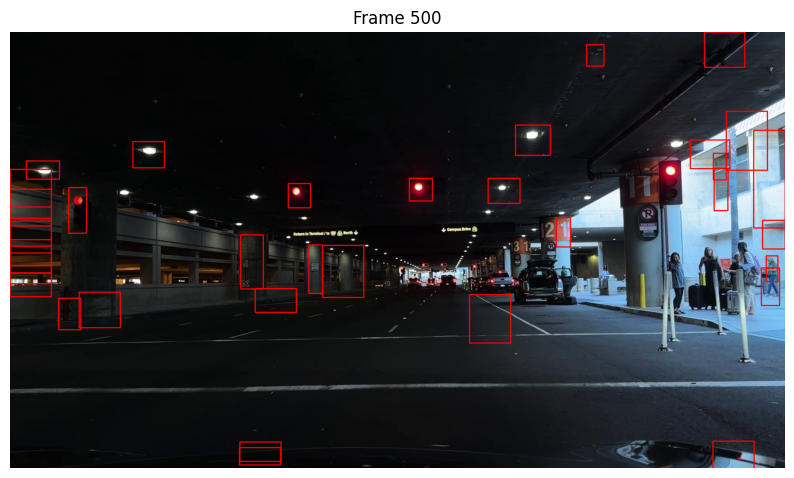

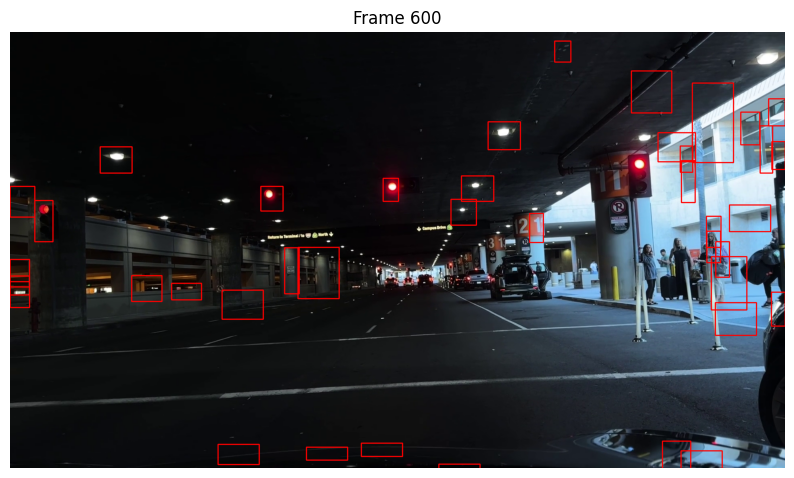

Video saved to ../videos/output.mp4


In [ ]:
b